# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 17237 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 17237) |           | Elapsed Time: 0:00:29 ETA:  5 days, 20:49:41

  0% (   69 of 17237) |                    | Elapsed Time: 0:00:30 ETA:  0:03:44

  0% (  139 of 17237) |                    | Elapsed Time: 0:00:31 ETA:  0:03:39

  1% (  216 of 17237) |                    | Elapsed Time: 0:00:32 ETA:  0:03:41

  1% (  279 of 17237) |                    | Elapsed Time: 0:00:33 ETA:  0:03:45

  1% (  342 of 17237) |                    | Elapsed Time: 0:00:34 ETA:  0:03:47

  2% (  398 of 17237) |                    | Elapsed Time: 0:00:35 ETA:  0:03:53

  2% (  431 of 17237) |                    | Elapsed Time: 0:00:36 ETA:  0:03:52

  2% (  490 of 17237) |                    | Elapsed Time: 0:00:37 ETA:  0:03:54

  3% (  549 of 17237) |                    | Elapsed Time: 0:00:38 ETA:  0:03:58

  3% (  614 of 17237) |                    | Elapsed Time: 0:00:39 ETA:  0:04:00

  3% (  647 of 17237) |                    | Elapsed Time: 0:00:39 ETA:  0:04:02

  4% (  715 of 17237) |                    | Elapsed Time: 0:00:40 ETA:  0:03:58

  4% (  776 of 17237) |                    | Elapsed Time: 0:00:41 ETA:  0:03:59

  4% (  840 of 17237) |                    | Elapsed Time: 0:00:42 ETA:  0:03:57

  5% (  862 of 17237) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:55

  5% (  924 of 17237) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:55

  5% (  979 of 17237) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:57

  6% ( 1045 of 17237) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:52

  6% ( 1078 of 17237) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:52

  6% ( 1145 of 17237) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:47

  7% ( 1217 of 17237) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:44

  7% ( 1293 of 17237) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:36

  7% ( 1366 of 17237) |#                   | Elapsed Time: 0:00:50 ETA:  0:03:28

  8% ( 1423 of 17237) |#                   | Elapsed Time: 0:00:51 ETA:  0:03:30

  8% ( 1486 of 17237) |#                   | Elapsed Time: 0:00:52 ETA:  0:03:25

  8% ( 1509 of 17237) |#                   | Elapsed Time: 0:00:53 ETA:  0:03:23

  8% ( 1521 of 17237) |#                   | Elapsed Time: 0:00:54 ETA:  0:03:55

  9% ( 1589 of 17237) |#                   | Elapsed Time: 0:00:55 ETA:  0:03:53

  9% ( 1653 of 17237) |#                   | Elapsed Time: 0:00:56 ETA:  0:03:57

 10% ( 1724 of 17237) |##                  | Elapsed Time: 0:00:57 ETA:  0:04:01

 10% ( 1788 of 17237) |##                  | Elapsed Time: 0:00:58 ETA:  0:04:06

 10% ( 1853 of 17237) |##                  | Elapsed Time: 0:00:59 ETA:  0:04:00

 11% ( 1912 of 17237) |##                  | Elapsed Time: 0:01:00 ETA:  0:04:02

 11% ( 1940 of 17237) |##                  | Elapsed Time: 0:01:00 ETA:  0:04:05

 11% ( 1999 of 17237) |##                  | Elapsed Time: 0:01:01 ETA:  0:03:34

 11% ( 2054 of 17237) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:41

 12% ( 2111 of 17237) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:45

 12% ( 2155 of 17237) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:49

 12% ( 2206 of 17237) |##                  | Elapsed Time: 0:01:05 ETA:  0:03:53

 13% ( 2269 of 17237) |##                  | Elapsed Time: 0:01:06 ETA:  0:03:53

 13% ( 2327 of 17237) |##                  | Elapsed Time: 0:01:07 ETA:  0:03:56

 13% ( 2371 of 17237) |##                  | Elapsed Time: 0:01:08 ETA:  0:03:56

 14% ( 2445 of 17237) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:44

 14% ( 2513 of 17237) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:37

 15% ( 2586 of 17237) |###                 | Elapsed Time: 0:01:11 ETA:  0:03:28

 15% ( 2659 of 17237) |###                 | Elapsed Time: 0:01:12 ETA:  0:03:20

 15% ( 2723 of 17237) |###                 | Elapsed Time: 0:01:13 ETA:  0:03:12

 16% ( 2777 of 17237) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:16

 16% ( 2802 of 17237) |###                 | Elapsed Time: 0:01:15 ETA:  0:03:16

 16% ( 2872 of 17237) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:10

 17% ( 2942 of 17237) |###                 | Elapsed Time: 0:01:17 ETA:  0:03:11

 17% ( 3017 of 17237) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:10

 17% ( 3079 of 17237) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:12

 18% ( 3137 of 17237) |###                 | Elapsed Time: 0:01:20 ETA:  0:03:19

 18% ( 3200 of 17237) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:19

 18% ( 3232 of 17237) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:11

 19% ( 3300 of 17237) |###                 | Elapsed Time: 0:01:22 ETA:  0:03:03

 19% ( 3370 of 17237) |###                 | Elapsed Time: 0:01:23 ETA:  0:03:02

 19% ( 3434 of 17237) |###                 | Elapsed Time: 0:01:24 ETA:  0:03:04

 20% ( 3448 of 17237) |####                | Elapsed Time: 0:01:24 ETA:  0:03:03

 20% ( 3503 of 17237) |####                | Elapsed Time: 0:01:25 ETA:  0:03:08

 20% ( 3563 of 17237) |####                | Elapsed Time: 0:01:26 ETA:  0:03:08

 21% ( 3623 of 17237) |####                | Elapsed Time: 0:01:27 ETA:  0:03:06

 21% ( 3663 of 17237) |####                | Elapsed Time: 0:01:28 ETA:  0:03:06

 21% ( 3740 of 17237) |####                | Elapsed Time: 0:01:29 ETA:  0:02:59

 22% ( 3815 of 17237) |####                | Elapsed Time: 0:01:30 ETA:  0:02:54

 22% ( 3879 of 17237) |####                | Elapsed Time: 0:01:31 ETA:  0:02:51

 22% ( 3957 of 17237) |####                | Elapsed Time: 0:01:32 ETA:  0:02:43

 23% ( 4035 of 17237) |####                | Elapsed Time: 0:01:33 ETA:  0:02:38

 23% ( 4094 of 17237) |####                | Elapsed Time: 0:01:34 ETA:  0:02:27

 24% ( 4173 of 17237) |####                | Elapsed Time: 0:01:35 ETA:  0:02:18

 24% ( 4236 of 17237) |####                | Elapsed Time: 0:01:36 ETA:  0:02:16

 25% ( 4310 of 17237) |#####               | Elapsed Time: 0:01:37 ETA:  0:02:14

 25% ( 4383 of 17237) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:13

 25% ( 4460 of 17237) |#####               | Elapsed Time: 0:01:39 ETA:  0:02:11

 26% ( 4525 of 17237) |#####               | Elapsed Time: 0:01:40 ETA:  0:02:11

 26% ( 4598 of 17237) |#####               | Elapsed Time: 0:01:41 ETA:  0:02:12

 27% ( 4677 of 17237) |#####               | Elapsed Time: 0:01:42 ETA:  0:02:11

 27% ( 4719 of 17237) |#####               | Elapsed Time: 0:01:43 ETA:  0:02:45

 27% ( 4741 of 17237) |#####               | Elapsed Time: 0:01:44 ETA:  0:02:43

 27% ( 4813 of 17237) |#####               | Elapsed Time: 0:01:45 ETA:  0:02:42

 28% ( 4887 of 17237) |#####               | Elapsed Time: 0:01:46 ETA:  0:02:37

 28% ( 4956 of 17237) |#####               | Elapsed Time: 0:01:47 ETA:  0:02:35

 29% ( 5032 of 17237) |#####               | Elapsed Time: 0:01:48 ETA:  0:02:35

 29% ( 5108 of 17237) |#####               | Elapsed Time: 0:01:49 ETA:  0:02:33

 30% ( 5172 of 17237) |######              | Elapsed Time: 0:01:49 ETA:  0:02:32

 30% ( 5250 of 17237) |######              | Elapsed Time: 0:01:50 ETA:  0:02:32

 30% ( 5330 of 17237) |######              | Elapsed Time: 0:01:51 ETA:  0:01:57

 31% ( 5387 of 17237) |######              | Elapsed Time: 0:01:52 ETA:  0:01:55

 31% ( 5470 of 17237) |######              | Elapsed Time: 0:01:53 ETA:  0:01:50

 32% ( 5549 of 17237) |######              | Elapsed Time: 0:01:54 ETA:  0:01:47

 32% ( 5603 of 17237) |######              | Elapsed Time: 0:01:55 ETA:  0:01:49

 32% ( 5670 of 17237) |######              | Elapsed Time: 0:01:56 ETA:  0:01:51

 33% ( 5724 of 17237) |######              | Elapsed Time: 0:01:57 ETA:  0:01:58

 33% ( 5792 of 17237) |######              | Elapsed Time: 0:01:58 ETA:  0:02:00

 33% ( 5818 of 17237) |######              | Elapsed Time: 0:01:58 ETA:  0:02:03

 34% ( 5870 of 17237) |######              | Elapsed Time: 0:01:59 ETA:  0:02:15

 34% ( 5935 of 17237) |######              | Elapsed Time: 0:02:00 ETA:  0:02:19

 34% ( 5985 of 17237) |######              | Elapsed Time: 0:02:01 ETA:  0:02:35

 35% ( 6033 of 17237) |#######             | Elapsed Time: 0:02:02 ETA:  0:02:40

 35% ( 6110 of 17237) |#######             | Elapsed Time: 0:02:03 ETA:  0:02:33

 35% ( 6186 of 17237) |#######             | Elapsed Time: 0:02:04 ETA:  0:02:27

 36% ( 6249 of 17237) |#######             | Elapsed Time: 0:02:05 ETA:  0:02:14

 36% ( 6325 of 17237) |#######             | Elapsed Time: 0:02:06 ETA:  0:02:09

 37% ( 6399 of 17237) |#######             | Elapsed Time: 0:02:07 ETA:  0:02:04

 37% ( 6464 of 17237) |#######             | Elapsed Time: 0:02:08 ETA:  0:01:57

 37% ( 6531 of 17237) |#######             | Elapsed Time: 0:02:09 ETA:  0:01:49

 38% ( 6603 of 17237) |#######             | Elapsed Time: 0:02:10 ETA:  0:01:48

 38% ( 6680 of 17237) |#######             | Elapsed Time: 0:02:11 ETA:  0:01:52

 39% ( 6751 of 17237) |#######             | Elapsed Time: 0:02:12 ETA:  0:01:54

 39% ( 6830 of 17237) |#######             | Elapsed Time: 0:02:13 ETA:  0:01:52

 40% ( 6895 of 17237) |########            | Elapsed Time: 0:02:14 ETA:  0:01:50

 40% ( 6965 of 17237) |########            | Elapsed Time: 0:02:15 ETA:  0:01:45

 40% ( 7040 of 17237) |########            | Elapsed Time: 0:02:16 ETA:  0:01:43

 41% ( 7111 of 17237) |########            | Elapsed Time: 0:02:17 ETA:  0:01:41

 41% ( 7183 of 17237) |########            | Elapsed Time: 0:02:18 ETA:  0:01:39

 42% ( 7253 of 17237) |########            | Elapsed Time: 0:02:19 ETA:  0:01:40

 42% ( 7326 of 17237) |########            | Elapsed Time: 0:02:20 ETA:  0:01:42

 42% ( 7396 of 17237) |########            | Elapsed Time: 0:02:21 ETA:  0:01:44

 43% ( 7460 of 17237) |########            | Elapsed Time: 0:02:22 ETA:  0:01:45

 43% ( 7542 of 17237) |########            | Elapsed Time: 0:02:23 ETA:  0:01:44

 44% ( 7620 of 17237) |########            | Elapsed Time: 0:02:24 ETA:  0:01:39

 44% ( 7694 of 17237) |########            | Elapsed Time: 0:02:25 ETA:  0:01:37

 45% ( 7757 of 17237) |#########           | Elapsed Time: 0:02:26 ETA:  0:01:34

 45% ( 7830 of 17237) |#########           | Elapsed Time: 0:02:27 ETA:  0:01:32

 45% ( 7896 of 17237) |#########           | Elapsed Time: 0:02:28 ETA:  0:01:34

 46% ( 7973 of 17237) |#########           | Elapsed Time: 0:02:29 ETA:  0:01:28

 46% ( 8048 of 17237) |#########           | Elapsed Time: 0:02:30 ETA:  0:01:26

 47% ( 8123 of 17237) |#########           | Elapsed Time: 0:02:31 ETA:  0:01:24

 47% ( 8188 of 17237) |#########           | Elapsed Time: 0:02:32 ETA:  0:01:25

 47% ( 8254 of 17237) |#########           | Elapsed Time: 0:02:33 ETA:  0:01:27

 48% ( 8327 of 17237) |#########           | Elapsed Time: 0:02:34 ETA:  0:01:26

 48% ( 8404 of 17237) |#########           | Elapsed Time: 0:02:35 ETA:  0:01:22

 49% ( 8486 of 17237) |#########           | Elapsed Time: 0:02:36 ETA:  0:01:17

 49% ( 8555 of 17237) |#########           | Elapsed Time: 0:02:37 ETA:  0:01:18

 50% ( 8619 of 17237) |##########          | Elapsed Time: 0:02:38 ETA:  0:01:22

 50% ( 8669 of 17237) |##########          | Elapsed Time: 0:02:40 ETA:  0:02:08

 50% ( 8740 of 17237) |##########          | Elapsed Time: 0:02:41 ETA:  0:02:08

 51% ( 8811 of 17237) |##########          | Elapsed Time: 0:02:42 ETA:  0:02:05

 51% ( 8834 of 17237) |##########          | Elapsed Time: 0:02:43 ETA:  0:02:10

 51% ( 8905 of 17237) |##########          | Elapsed Time: 0:02:44 ETA:  0:02:09

 52% ( 8980 of 17237) |##########          | Elapsed Time: 0:02:45 ETA:  0:02:01

 52% ( 9050 of 17237) |##########          | Elapsed Time: 0:02:46 ETA:  0:02:13

 52% ( 9117 of 17237) |##########          | Elapsed Time: 0:02:47 ETA:  0:02:10

 53% ( 9188 of 17237) |##########          | Elapsed Time: 0:02:48 ETA:  0:01:18

 53% ( 9265 of 17237) |##########          | Elapsed Time: 0:02:49 ETA:  0:01:16

 54% ( 9332 of 17237) |##########          | Elapsed Time: 0:02:50 ETA:  0:01:17

 54% ( 9406 of 17237) |##########          | Elapsed Time: 0:02:51 ETA:  0:01:15

 55% ( 9481 of 17237) |###########         | Elapsed Time: 0:02:52 ETA:  0:01:15

 55% ( 9550 of 17237) |###########         | Elapsed Time: 0:02:53 ETA:  0:01:15

 55% ( 9614 of 17237) |###########         | Elapsed Time: 0:02:54 ETA:  0:01:16

 56% ( 9696 of 17237) |###########         | Elapsed Time: 0:02:55 ETA:  0:01:14

 56% ( 9765 of 17237) |###########         | Elapsed Time: 0:02:56 ETA:  0:01:13

 57% ( 9838 of 17237) |###########         | Elapsed Time: 0:02:57 ETA:  0:01:10

 57% ( 9912 of 17237) |###########         | Elapsed Time: 0:02:58 ETA:  0:01:12

 57% ( 9979 of 17237) |###########         | Elapsed Time: 0:02:59 ETA:  0:01:12

 58% (10048 of 17237) |###########         | Elapsed Time: 0:03:00 ETA:  0:01:11

 58% (10127 of 17237) |###########         | Elapsed Time: 0:03:01 ETA:  0:01:09

 59% (10201 of 17237) |###########         | Elapsed Time: 0:03:02 ETA:  0:01:05

 59% (10277 of 17237) |###########         | Elapsed Time: 0:03:03 ETA:  0:01:00

 60% (10343 of 17237) |############        | Elapsed Time: 0:03:04 ETA:  0:01:02

 60% (10420 of 17237) |############        | Elapsed Time: 0:03:05 ETA:  0:00:56

 60% (10494 of 17237) |############        | Elapsed Time: 0:03:06 ETA:  0:00:54

 61% (10558 of 17237) |############        | Elapsed Time: 0:03:07 ETA:  0:00:50

 61% (10626 of 17237) |############        | Elapsed Time: 0:03:08 ETA:  0:00:50

 62% (10692 of 17237) |############        | Elapsed Time: 0:03:09 ETA:  0:00:51

 62% (10753 of 17237) |############        | Elapsed Time: 0:03:10 ETA:  0:00:54

 62% (10774 of 17237) |############        | Elapsed Time: 0:03:11 ETA:  0:00:58

 62% (10835 of 17237) |############        | Elapsed Time: 0:03:12 ETA:  0:01:03

 63% (10911 of 17237) |############        | Elapsed Time: 0:03:13 ETA:  0:00:58

 63% (10989 of 17237) |############        | Elapsed Time: 0:03:14 ETA:  0:00:57

 64% (11059 of 17237) |############        | Elapsed Time: 0:03:15 ETA:  0:00:58

 64% (11133 of 17237) |############        | Elapsed Time: 0:03:16 ETA:  0:00:57

 65% (11205 of 17237) |#############       | Elapsed Time: 0:03:17 ETA:  0:00:53

 65% (11264 of 17237) |#############       | Elapsed Time: 0:03:18 ETA:  0:00:53

 65% (11328 of 17237) |#############       | Elapsed Time: 0:03:19 ETA:  0:00:52

 66% (11395 of 17237) |#############       | Elapsed Time: 0:03:20 ETA:  0:00:48

 66% (11420 of 17237) |#############       | Elapsed Time: 0:03:20 ETA:  0:00:54

 66% (11488 of 17237) |#############       | Elapsed Time: 0:03:21 ETA:  0:00:58

 67% (11549 of 17237) |#############       | Elapsed Time: 0:03:22 ETA:  0:01:02

 67% (11635 of 17237) |#############       | Elapsed Time: 0:03:23 ETA:  0:01:01

 67% (11707 of 17237) |#############       | Elapsed Time: 0:03:24 ETA:  0:00:57

 68% (11781 of 17237) |#############       | Elapsed Time: 0:03:25 ETA:  0:00:48

 68% (11851 of 17237) |#############       | Elapsed Time: 0:03:26 ETA:  0:00:43

 69% (11927 of 17237) |#############       | Elapsed Time: 0:03:27 ETA:  0:00:37

 69% (11997 of 17237) |#############       | Elapsed Time: 0:03:28 ETA:  0:00:34

 70% (12066 of 17237) |##############      | Elapsed Time: 0:03:29 ETA:  0:00:30

 70% (12141 of 17237) |##############      | Elapsed Time: 0:03:30 ETA:  0:00:23

 70% (12208 of 17237) |##############      | Elapsed Time: 0:03:31 ETA:  0:00:25

 71% (12282 of 17237) |##############      | Elapsed Time: 0:03:32 ETA:  0:00:25

 71% (12357 of 17237) |##############      | Elapsed Time: 0:03:33 ETA:  0:00:24

 72% (12429 of 17237) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:24

 72% (12497 of 17237) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:24

 72% (12565 of 17237) |##############      | Elapsed Time: 0:03:36 ETA:  0:00:24

 73% (12634 of 17237) |##############      | Elapsed Time: 0:03:37 ETA:  0:00:26

 73% (12713 of 17237) |##############      | Elapsed Time: 0:03:39 ETA:  0:00:27

 74% (12787 of 17237) |##############      | Elapsed Time: 0:03:40 ETA:  0:00:24

 74% (12858 of 17237) |##############      | Elapsed Time: 0:03:41 ETA:  0:00:23

 75% (12928 of 17237) |###############     | Elapsed Time: 0:03:42 ETA:  0:00:27

 75% (13007 of 17237) |###############     | Elapsed Time: 0:03:43 ETA:  0:00:23

 75% (13075 of 17237) |###############     | Elapsed Time: 0:03:44 ETA:  0:00:22

 76% (13144 of 17237) |###############     | Elapsed Time: 0:03:45 ETA:  0:00:21

 76% (13208 of 17237) |###############     | Elapsed Time: 0:03:46 ETA:  0:00:23

 76% (13271 of 17237) |###############     | Elapsed Time: 0:03:47 ETA:  0:00:28

 77% (13339 of 17237) |###############     | Elapsed Time: 0:03:48 ETA:  0:00:28

 77% (13359 of 17237) |###############     | Elapsed Time: 0:03:48 ETA:  0:00:24

 77% (13439 of 17237) |###############     | Elapsed Time: 0:03:49 ETA:  0:00:18

 78% (13513 of 17237) |###############     | Elapsed Time: 0:03:50 ETA:  0:00:19

 78% (13545 of 17237) |###############     | Elapsed Time: 0:03:52 ETA:  0:01:18

 78% (13575 of 17237) |###############     | Elapsed Time: 0:03:53 ETA:  0:01:20

 79% (13646 of 17237) |###############     | Elapsed Time: 0:03:54 ETA:  0:01:09

 79% (13707 of 17237) |###############     | Elapsed Time: 0:03:55 ETA:  0:01:10

 80% (13790 of 17237) |################    | Elapsed Time: 0:03:56 ETA:  0:01:08

 80% (13864 of 17237) |################    | Elapsed Time: 0:03:57 ETA:  0:01:00

 80% (13939 of 17237) |################    | Elapsed Time: 0:03:58 ETA:  0:01:02

 81% (14006 of 17237) |################    | Elapsed Time: 0:03:59 ETA:  0:01:01

 81% (14080 of 17237) |################    | Elapsed Time: 0:04:00 ETA:  0:00:00

 82% (14153 of 17237) |################    | Elapsed Time: 0:04:01 ETA:  0:00:00

 82% (14221 of 17237) |################    | Elapsed Time: 0:04:02 ETA:  0:00:00

 82% (14292 of 17237) |################    | Elapsed Time: 0:04:03 ETA:  0:00:00

 83% (14352 of 17237) |################    | Elapsed Time: 0:04:04 ETA:  0:00:00

 83% (14436 of 17237) |################    | Elapsed Time: 0:04:05 ETA:  0:00:00

 84% (14508 of 17237) |################    | Elapsed Time: 0:04:06 ETA:  0:00:02

 84% (14578 of 17237) |################    | Elapsed Time: 0:04:07 ETA:  0:00:03

 85% (14652 of 17237) |#################   | Elapsed Time: 0:04:08 ETA:  0:00:01

 85% (14729 of 17237) |#################   | Elapsed Time: 0:04:09 ETA:  0:00:00

 85% (14809 of 17237) |#################   | Elapsed Time: 0:04:10 ETA:  0:00:00

 86% (14867 of 17237) |#################   | Elapsed Time: 0:04:11 ETA:  0:00:00

 86% (14946 of 17237) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:00

 87% (15021 of 17237) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:00

 87% (15083 of 17237) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:00

 87% (15164 of 17237) |#################   | Elapsed Time: 0:04:14 ETA:  0:00:00

 88% (15238 of 17237) |#################   | Elapsed Time: 0:04:15 ETA:  0:00:00

 88% (15298 of 17237) |#################   | Elapsed Time: 0:04:16 ETA:  0:00:00

 89% (15375 of 17237) |#################   | Elapsed Time: 0:04:17 ETA:  0:00:00

 89% (15450 of 17237) |#################   | Elapsed Time: 0:04:18 ETA:  0:00:00

 90% (15514 of 17237) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:00

 90% (15589 of 17237) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:00

 90% (15655 of 17237) |##################  | Elapsed Time: 0:04:21 ETA:  0:00:00

 91% (15729 of 17237) |##################  | Elapsed Time: 0:04:22 ETA:  0:00:00

 91% (15794 of 17237) |##################  | Elapsed Time: 0:04:23 ETA:  0:00:00

 92% (15859 of 17237) |##################  | Elapsed Time: 0:04:24 ETA:  0:00:00

 92% (15945 of 17237) |##################  | Elapsed Time: 0:04:25 ETA:  0:00:00

 92% (16023 of 17237) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:00

 93% (16099 of 17237) |##################  | Elapsed Time: 0:04:27 ETA:  0:00:00

 93% (16160 of 17237) |##################  | Elapsed Time: 0:04:28 ETA:  0:00:00

 94% (16233 of 17237) |##################  | Elapsed Time: 0:04:29 ETA:  0:00:00

 94% (16305 of 17237) |##################  | Elapsed Time: 0:04:30 ETA:  0:00:00

 95% (16376 of 17237) |################### | Elapsed Time: 0:04:31 ETA:  0:00:00

 95% (16453 of 17237) |################### | Elapsed Time: 0:04:32 ETA:  0:00:00

 95% (16520 of 17237) |################### | Elapsed Time: 0:04:33 ETA:  0:00:00

 96% (16591 of 17237) |################### | Elapsed Time: 0:04:34 ETA:  0:00:00

 96% (16667 of 17237) |################### | Elapsed Time: 0:04:35 ETA:  0:00:00

 97% (16741 of 17237) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 97% (16807 of 17237) |################### | Elapsed Time: 0:04:37 ETA:  0:00:00

 97% (16879 of 17237) |################### | Elapsed Time: 0:04:38 ETA:  0:00:00

 98% (16951 of 17237) |################### | Elapsed Time: 0:04:39 ETA:  0:00:00

 98% (17022 of 17237) |################### | Elapsed Time: 0:04:40 ETA:  0:00:00

 99% (17096 of 17237) |################### | Elapsed Time: 0:04:41 ETA:  0:00:00

 99% (17163 of 17237) |################### | Elapsed Time: 0:04:42 ETA:  0:00:00

100% (17237 of 17237) |####################| Elapsed Time: 0:04:43 Time: 0:04:43


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

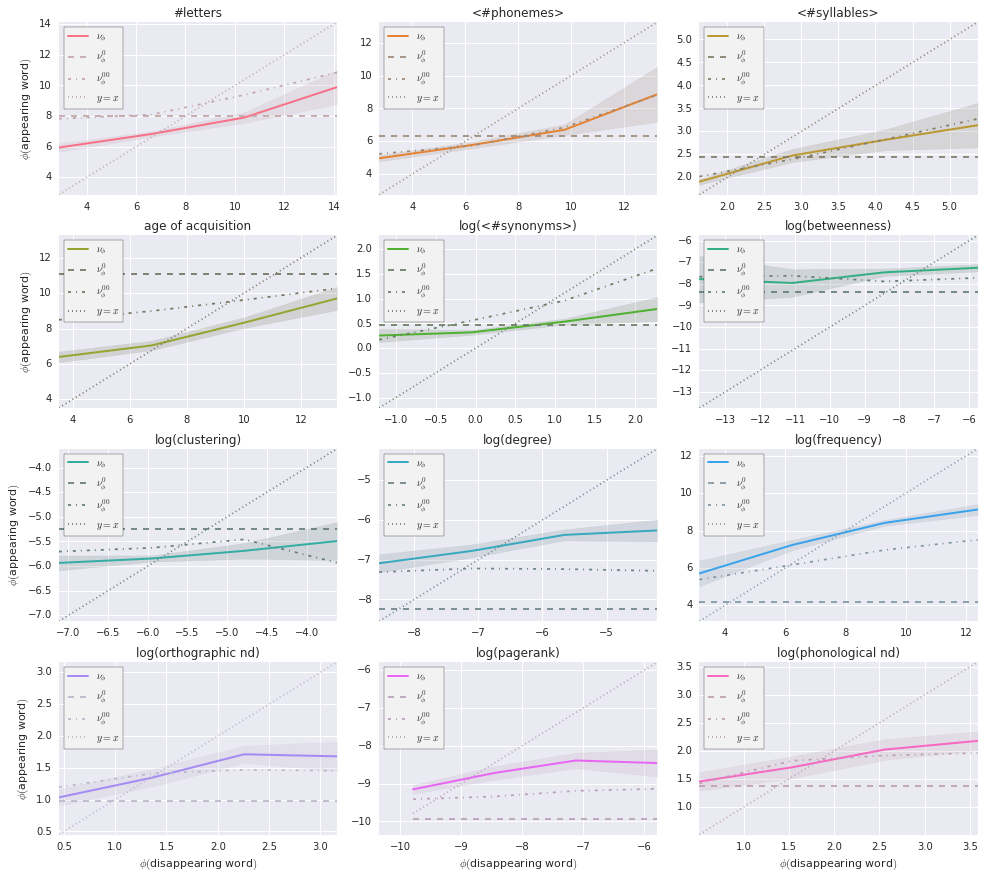

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

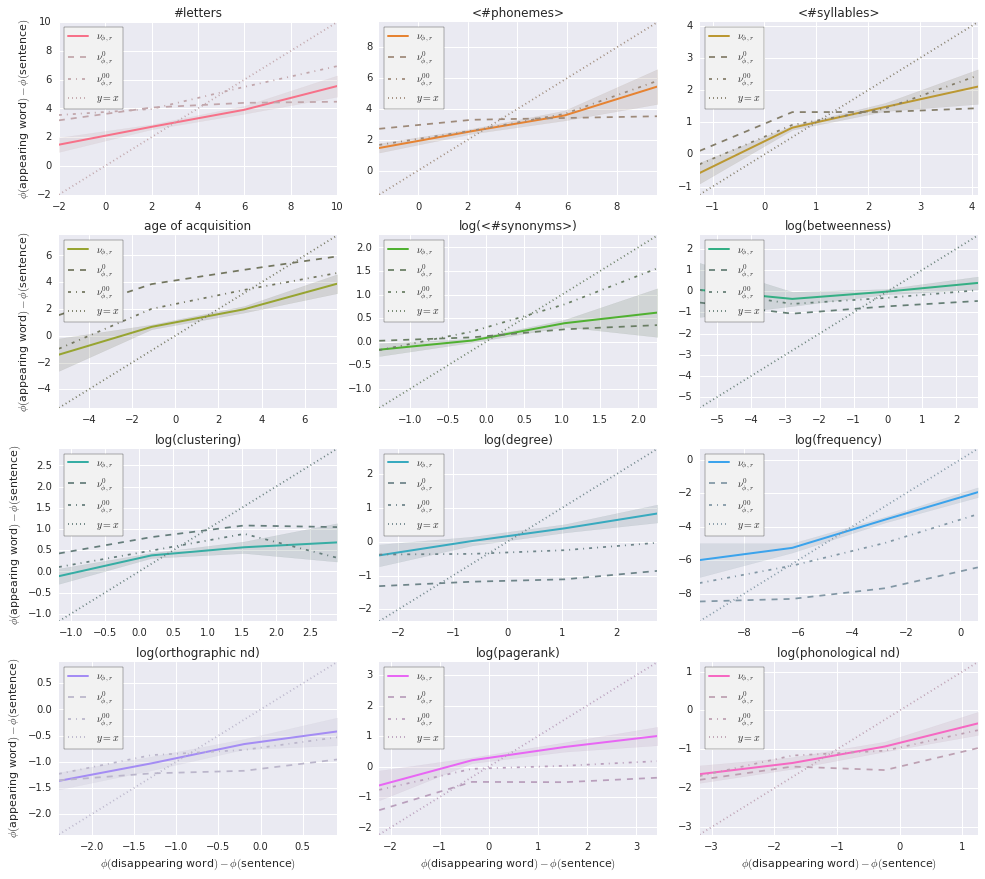

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

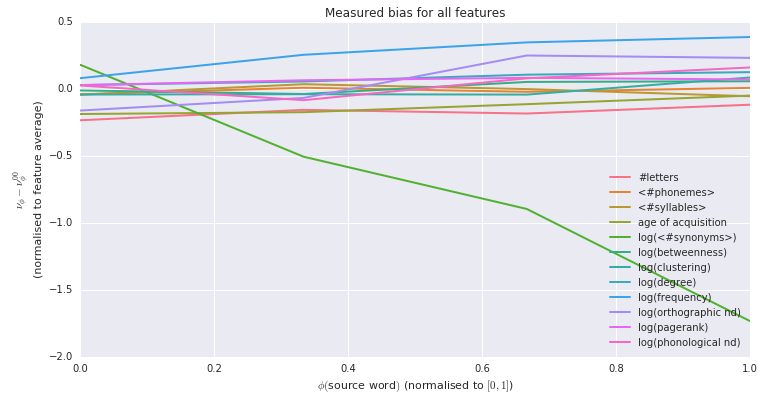

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

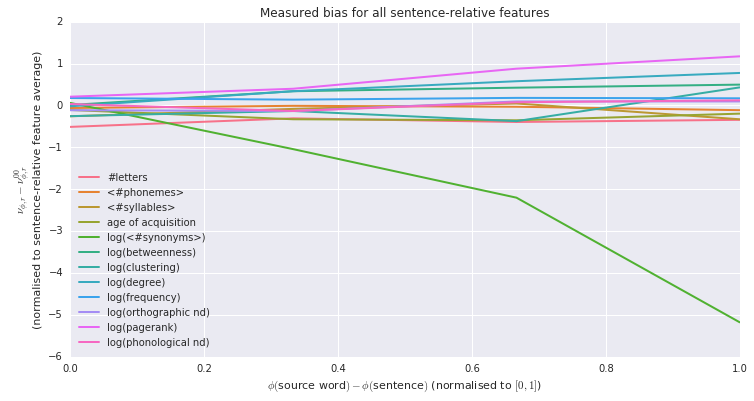

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

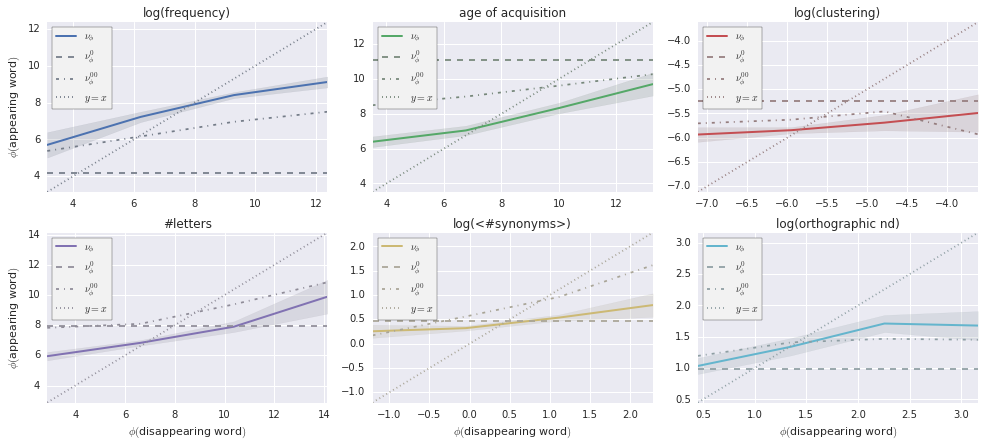

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

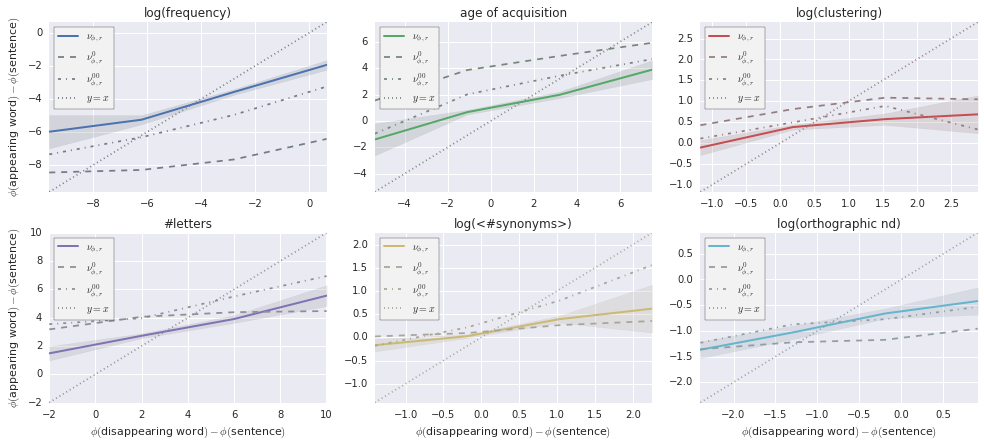

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

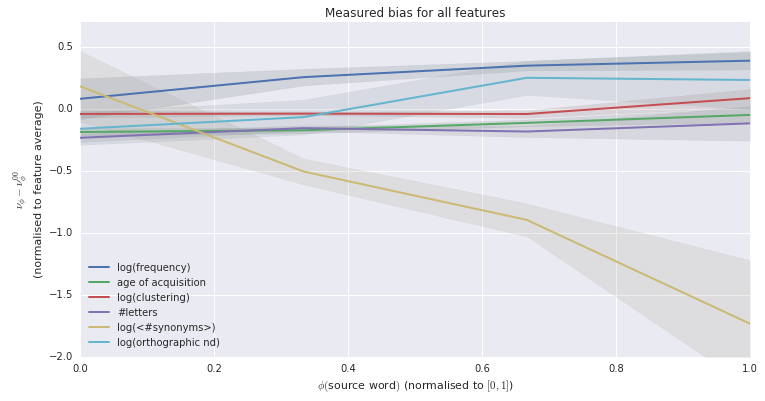

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

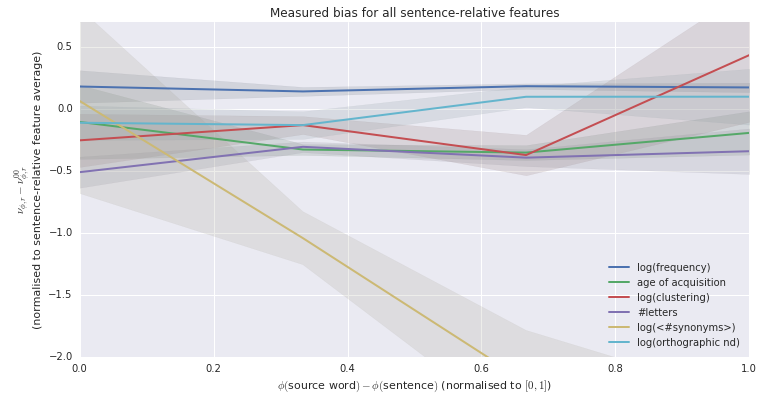

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


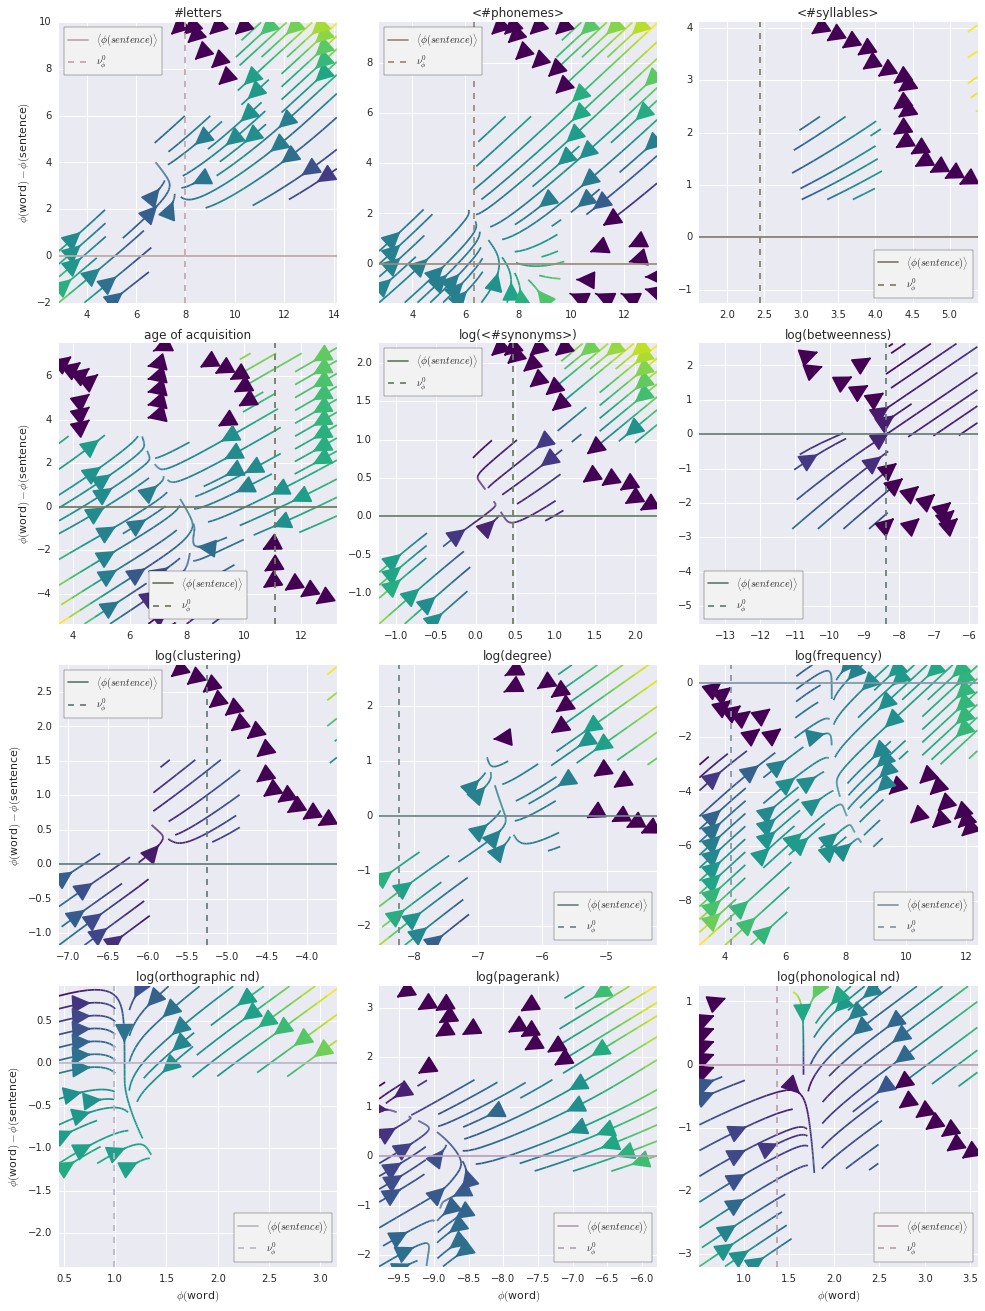

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


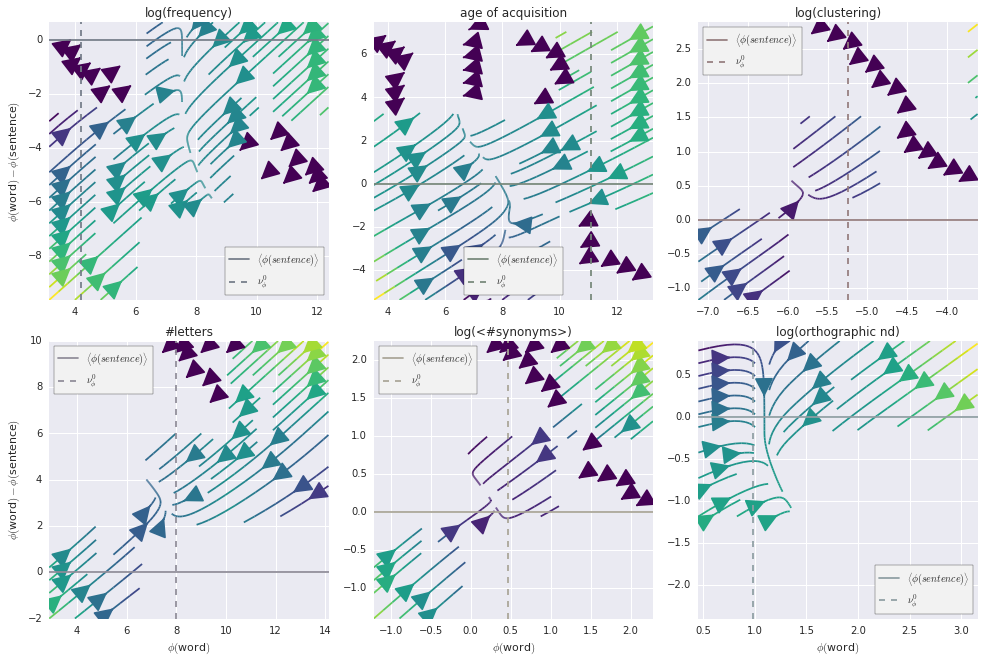

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51080295  0.17469427  0.09240845  0.07677393  0.03550081  0.02982944
  0.02149859  0.01910852  0.01690978  0.00995423  0.00734375]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.443121,0.318687,-0.090227,0.249055,0.251416,-0.419420,0.223872,0.298475,-0.385341,0.288649,-0.147532,-0.003343
Component-1,0.268824,-0.387660,0.130070,-0.281927,-0.294351,-0.428095,0.192160,-0.302242,-0.433989,0.259471,-0.163966,0.017702
Component-2,0.699484,0.116818,-0.100955,0.047999,0.679034,-0.110991,-0.032124,-0.001055,-0.061685,0.059930,-0.004444,-0.052200


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 17237) |            | Elapsed Time: 0:00:46 ETA:  9 days, 7:33:54

  0% (  119 of 17237) |                    | Elapsed Time: 0:00:47 ETA:  0:01:39

  1% (  216 of 17237) |                    | Elapsed Time: 0:00:48 ETA:  0:01:34

  2% (  360 of 17237) |                    | Elapsed Time: 0:00:49 ETA:  0:01:24

  2% (  431 of 17237) |                    | Elapsed Time: 0:00:50 ETA:  0:01:26

  3% (  549 of 17237) |                    | Elapsed Time: 0:00:51 ETA:  0:01:27

  3% (  647 of 17237) |                    | Elapsed Time: 0:00:51 ETA:  0:01:23

  4% (  752 of 17237) |                    | Elapsed Time: 0:00:52 ETA:  0:01:26

  4% (  841 of 17237) |                    | Elapsed Time: 0:00:53 ETA:  0:01:31

  5% (  862 of 17237) |#                   | Elapsed Time: 0:00:54 ETA:  0:01:32

  5% (  951 of 17237) |#                   | Elapsed Time: 0:00:55 ETA:  0:01:36

  6% ( 1055 of 17237) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:39

  6% ( 1078 of 17237) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:46

  6% ( 1191 of 17237) |#                   | Elapsed Time: 0:00:57 ETA:  0:01:45

  7% ( 1293 of 17237) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:42

  8% ( 1410 of 17237) |#                   | Elapsed Time: 0:00:59 ETA:  0:01:44

  8% ( 1509 of 17237) |#                   | Elapsed Time: 0:01:00 ETA:  0:01:42

  9% ( 1630 of 17237) |#                   | Elapsed Time: 0:01:01 ETA:  0:01:37

 10% ( 1724 of 17237) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:34

 10% ( 1860 of 17237) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:28

 11% ( 1940 of 17237) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:24

 11% ( 2040 of 17237) |##                  | Elapsed Time: 0:01:04 ETA:  0:01:29

 12% ( 2121 of 17237) |##                  | Elapsed Time: 0:01:05 ETA:  0:01:36

 12% ( 2155 of 17237) |##                  | Elapsed Time: 0:01:06 ETA:  0:01:32

 13% ( 2287 of 17237) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:26

 13% ( 2371 of 17237) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:25

 14% ( 2483 of 17237) |##                  | Elapsed Time: 0:01:08 ETA:  0:01:20

 15% ( 2586 of 17237) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:20

 15% ( 2711 of 17237) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:21

 16% ( 2802 of 17237) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:22

 16% ( 2929 of 17237) |###                 | Elapsed Time: 0:01:12 ETA:  0:01:16

 17% ( 3017 of 17237) |###                 | Elapsed Time: 0:01:13 ETA:  0:01:08

 18% ( 3112 of 17237) |###                 | Elapsed Time: 0:01:14 ETA:  0:01:10

 18% ( 3232 of 17237) |###                 | Elapsed Time: 0:01:15 ETA:  0:01:14

 19% ( 3390 of 17237) |###                 | Elapsed Time: 0:01:16 ETA:  0:01:05

 20% ( 3448 of 17237) |####                | Elapsed Time: 0:01:16 ETA:  0:01:00

 20% ( 3560 of 17237) |####                | Elapsed Time: 0:01:17 ETA:  0:01:02

 21% ( 3663 of 17237) |####                | Elapsed Time: 0:01:18 ETA:  0:01:03

 21% ( 3778 of 17237) |####                | Elapsed Time: 0:01:19 ETA:  0:01:04

 22% ( 3879 of 17237) |####                | Elapsed Time: 0:01:20 ETA:  0:01:05

 23% ( 4021 of 17237) |####                | Elapsed Time: 0:01:21 ETA:  0:00:56

 23% ( 4094 of 17237) |####                | Elapsed Time: 0:01:21 ETA:  0:00:52

 24% ( 4218 of 17237) |####                | Elapsed Time: 0:01:22 ETA:  0:00:51

 25% ( 4310 of 17237) |#####               | Elapsed Time: 0:01:23 ETA:  0:00:54

 25% ( 4446 of 17237) |#####               | Elapsed Time: 0:01:24 ETA:  0:00:54

 26% ( 4525 of 17237) |#####               | Elapsed Time: 0:01:25 ETA:  0:00:51

 26% ( 4653 of 17237) |#####               | Elapsed Time: 0:01:26 ETA:  0:00:47

 27% ( 4741 of 17237) |#####               | Elapsed Time: 0:01:26 ETA:  0:00:44

 28% ( 4850 of 17237) |#####               | Elapsed Time: 0:01:27 ETA:  0:00:45

 28% ( 4956 of 17237) |#####               | Elapsed Time: 0:01:28 ETA:  0:00:45

 29% ( 5088 of 17237) |#####               | Elapsed Time: 0:01:29 ETA:  0:00:45

 30% ( 5172 of 17237) |######              | Elapsed Time: 0:01:30 ETA:  0:00:45

 30% ( 5287 of 17237) |######              | Elapsed Time: 0:01:31 ETA:  0:00:46

 31% ( 5387 of 17237) |######              | Elapsed Time: 0:01:32 ETA:  0:00:47

 32% ( 5516 of 17237) |######              | Elapsed Time: 0:01:33 ETA:  0:00:45

 32% ( 5603 of 17237) |######              | Elapsed Time: 0:01:34 ETA:  0:00:54

 33% ( 5701 of 17237) |######              | Elapsed Time: 0:01:35 ETA:  0:00:55

 33% ( 5818 of 17237) |######              | Elapsed Time: 0:01:36 ETA:  0:01:00

 34% ( 5935 of 17237) |######              | Elapsed Time: 0:01:37 ETA:  0:00:59

 35% ( 6033 of 17237) |#######             | Elapsed Time: 0:01:38 ETA:  0:01:09

 35% ( 6165 of 17237) |#######             | Elapsed Time: 0:01:39 ETA:  0:01:07

 36% ( 6249 of 17237) |#######             | Elapsed Time: 0:01:40 ETA:  0:00:56

 37% ( 6379 of 17237) |#######             | Elapsed Time: 0:01:41 ETA:  0:00:50

 37% ( 6464 of 17237) |#######             | Elapsed Time: 0:01:41 ETA:  0:00:43

 38% ( 6586 of 17237) |#######             | Elapsed Time: 0:01:42 ETA:  0:00:41

 38% ( 6680 of 17237) |#######             | Elapsed Time: 0:01:43 ETA:  0:00:40

 39% ( 6783 of 17237) |#######             | Elapsed Time: 0:01:44 ETA:  0:00:41

 40% ( 6895 of 17237) |########            | Elapsed Time: 0:01:45 ETA:  0:00:32

 40% ( 7030 of 17237) |########            | Elapsed Time: 0:01:46 ETA:  0:00:30

 41% ( 7111 of 17237) |########            | Elapsed Time: 0:01:47 ETA:  0:00:31

 41% ( 7228 of 17237) |########            | Elapsed Time: 0:01:48 ETA:  0:00:31

 42% ( 7326 of 17237) |########            | Elapsed Time: 0:01:48 ETA:  0:00:30

 43% ( 7436 of 17237) |########            | Elapsed Time: 0:01:52 ETA:  0:01:19

 43% ( 7542 of 17237) |########            | Elapsed Time: 0:01:53 ETA:  0:01:19

 44% ( 7642 of 17237) |########            | Elapsed Time: 0:01:54 ETA:  0:01:21

 45% ( 7757 of 17237) |#########           | Elapsed Time: 0:01:55 ETA:  0:01:27

 45% ( 7867 of 17237) |#########           | Elapsed Time: 0:01:56 ETA:  0:01:32

 46% ( 7973 of 17237) |#########           | Elapsed Time: 0:01:57 ETA:  0:01:29

 46% ( 8083 of 17237) |#########           | Elapsed Time: 0:01:58 ETA:  0:01:30

 47% ( 8188 of 17237) |#########           | Elapsed Time: 0:01:59 ETA:  0:01:28

 47% ( 8268 of 17237) |#########           | Elapsed Time: 0:02:00 ETA:  0:00:37

 48% ( 8404 of 17237) |#########           | Elapsed Time: 0:02:01 ETA:  0:00:32

 49% ( 8540 of 17237) |#########           | Elapsed Time: 0:02:02 ETA:  0:00:24

 50% ( 8619 of 17237) |##########          | Elapsed Time: 0:02:02 ETA:  0:00:19

 50% ( 8747 of 17237) |##########          | Elapsed Time: 0:02:03 ETA:  0:00:17

 51% ( 8834 of 17237) |##########          | Elapsed Time: 0:02:04 ETA:  0:00:16

 52% ( 8975 of 17237) |##########          | Elapsed Time: 0:02:05 ETA:  0:00:13

 52% ( 9050 of 17237) |##########          | Elapsed Time: 0:02:05 ETA:  0:00:08

 53% ( 9146 of 17237) |##########          | Elapsed Time: 0:02:06 ETA:  0:00:13

 53% ( 9265 of 17237) |##########          | Elapsed Time: 0:02:08 ETA:  0:00:12

 54% ( 9387 of 17237) |##########          | Elapsed Time: 0:02:09 ETA:  0:00:14

 55% ( 9481 of 17237) |###########         | Elapsed Time: 0:02:09 ETA:  0:00:13

 55% ( 9587 of 17237) |###########         | Elapsed Time: 0:02:10 ETA:  0:00:16

 56% ( 9671 of 17237) |###########         | Elapsed Time: 0:02:11 ETA:  0:00:20

 56% ( 9696 of 17237) |###########         | Elapsed Time: 0:02:12 ETA:  0:00:26

 56% ( 9813 of 17237) |###########         | Elapsed Time: 0:02:13 ETA:  0:00:28

 57% ( 9912 of 17237) |###########         | Elapsed Time: 0:02:13 ETA:  0:00:23

 58% (10035 of 17237) |###########         | Elapsed Time: 0:02:14 ETA:  0:00:17

 58% (10127 of 17237) |###########         | Elapsed Time: 0:02:15 ETA:  0:00:14

 59% (10255 of 17237) |###########         | Elapsed Time: 0:02:16 ETA:  0:00:12

 60% (10343 of 17237) |############        | Elapsed Time: 0:02:17 ETA:  0:00:11

 60% (10483 of 17237) |############        | Elapsed Time: 0:02:18 ETA:  0:00:05

 61% (10558 of 17237) |############        | Elapsed Time: 0:02:18 ETA:  0:00:00

 61% (10684 of 17237) |############        | Elapsed Time: 0:02:19 ETA:  0:00:00

 62% (10774 of 17237) |############        | Elapsed Time: 0:02:20 ETA:  0:00:00

 63% (10912 of 17237) |############        | Elapsed Time: 0:02:21 ETA:  0:00:00

 63% (10989 of 17237) |############        | Elapsed Time: 0:02:22 ETA:  0:00:00

 64% (11164 of 17237) |############        | Elapsed Time: 0:02:23 ETA:  0:00:00

 65% (11205 of 17237) |#############       | Elapsed Time: 0:02:23 ETA:  0:00:00

 65% (11326 of 17237) |#############       | Elapsed Time: 0:02:24 ETA:  0:00:00

 66% (11420 of 17237) |#############       | Elapsed Time: 0:02:25 ETA:  0:00:00

 66% (11548 of 17237) |#############       | Elapsed Time: 0:02:26 ETA:  0:00:00

 67% (11635 of 17237) |#############       | Elapsed Time: 0:02:26 ETA:  0:00:00

 68% (11769 of 17237) |#############       | Elapsed Time: 0:02:27 ETA:  0:00:00

 68% (11851 of 17237) |#############       | Elapsed Time: 0:02:28 ETA:  0:00:00

 69% (11969 of 17237) |#############       | Elapsed Time: 0:02:29 ETA:  0:00:00

 70% (12066 of 17237) |##############      | Elapsed Time: 0:02:30 ETA:  0:00:00

 70% (12195 of 17237) |##############      | Elapsed Time: 0:02:31 ETA:  0:00:00

 71% (12282 of 17237) |##############      | Elapsed Time: 0:02:32 ETA:  0:00:00

 71% (12404 of 17237) |##############      | Elapsed Time: 0:02:33 ETA:  0:00:00

 72% (12497 of 17237) |##############      | Elapsed Time: 0:02:34 ETA:  0:00:00

 73% (12631 of 17237) |##############      | Elapsed Time: 0:02:35 ETA:  0:00:00

 73% (12713 of 17237) |##############      | Elapsed Time: 0:02:35 ETA:  0:00:00

 74% (12859 of 17237) |##############      | Elapsed Time: 0:02:36 ETA:  0:00:00

 75% (12928 of 17237) |###############     | Elapsed Time: 0:02:37 ETA:  0:00:00

 75% (13066 of 17237) |###############     | Elapsed Time: 0:02:38 ETA:  0:00:00

 76% (13144 of 17237) |###############     | Elapsed Time: 0:02:38 ETA:  0:00:00

 76% (13270 of 17237) |###############     | Elapsed Time: 0:02:39 ETA:  0:00:00

 77% (13359 of 17237) |###############     | Elapsed Time: 0:02:40 ETA:  0:00:00

 78% (13487 of 17237) |###############     | Elapsed Time: 0:02:41 ETA:  0:00:00

 78% (13575 of 17237) |###############     | Elapsed Time: 0:02:42 ETA:  0:00:00

 79% (13685 of 17237) |###############     | Elapsed Time: 0:02:43 ETA:  0:00:00

 80% (13790 of 17237) |################    | Elapsed Time: 0:02:44 ETA:  0:00:00

 80% (13935 of 17237) |################    | Elapsed Time: 0:02:45 ETA:  0:00:00

 81% (14006 of 17237) |################    | Elapsed Time: 0:02:45 ETA:  0:00:00

 81% (14116 of 17237) |################    | Elapsed Time: 0:02:46 ETA:  0:00:00

 82% (14221 of 17237) |################    | Elapsed Time: 0:02:47 ETA:  0:00:00

 83% (14318 of 17237) |################    | Elapsed Time: 0:02:48 ETA:  0:00:00

 83% (14436 of 17237) |################    | Elapsed Time: 0:02:49 ETA:  0:00:00

 84% (14557 of 17237) |################    | Elapsed Time: 0:02:50 ETA:  0:00:00

 85% (14652 of 17237) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:00

 85% (14782 of 17237) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:00

 86% (14867 of 17237) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:00

 86% (14993 of 17237) |#################   | Elapsed Time: 0:02:53 ETA:  0:00:00

 87% (15083 of 17237) |#################   | Elapsed Time: 0:02:54 ETA:  0:00:00

 88% (15216 of 17237) |#################   | Elapsed Time: 0:02:55 ETA:  0:00:00

 88% (15298 of 17237) |#################   | Elapsed Time: 0:02:56 ETA:  0:00:00

 89% (15418 of 17237) |#################   | Elapsed Time: 0:02:57 ETA:  0:00:00

 90% (15514 of 17237) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 90% (15621 of 17237) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:00

 91% (15729 of 17237) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:00

 91% (15827 of 17237) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:00

 92% (15945 of 17237) |##################  | Elapsed Time: 0:03:01 ETA:  0:00:00

 93% (16070 of 17237) |##################  | Elapsed Time: 0:03:02 ETA:  0:00:00

 93% (16160 of 17237) |##################  | Elapsed Time: 0:03:03 ETA:  0:00:00

 94% (16292 of 17237) |##################  | Elapsed Time: 0:03:04 ETA:  0:00:00

 95% (16376 of 17237) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 95% (16496 of 17237) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 96% (16591 of 17237) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 97% (16724 of 17237) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 97% (16807 of 17237) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 98% (16932 of 17237) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

 98% (17022 of 17237) |################### | Elapsed Time: 0:03:10 ETA:  0:00:00

 99% (17145 of 17237) |################### | Elapsed Time: 0:03:11 ETA:  0:00:00

100% (17237 of 17237) |####################| Elapsed Time: 0:03:11 Time: 0:03:11


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

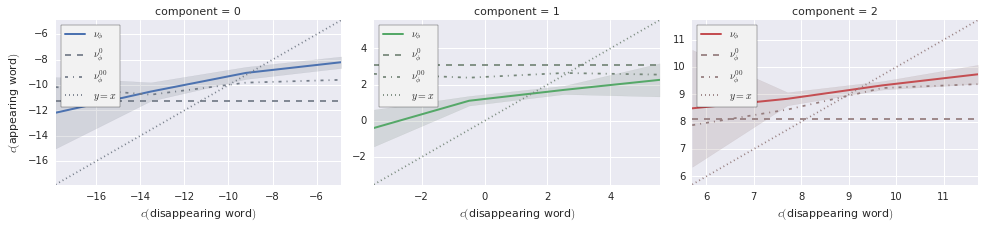

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.53476681  0.18373741  0.16710026  0.0453818 ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.679335,-0.098617,0.373914,-0.551318,0.291562,0.002797
Component-1,0.359292,0.108066,-0.554318,-0.680393,0.298136,-0.011907
Component-2,-0.631029,0.082687,-0.724510,0.257148,-0.027467,0.056308


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 17237) |           | Elapsed Time: 0:00:12 ETA:  2 days, 12:34:34

  0% (  136 of 17237) |                    | Elapsed Time: 0:00:13 ETA:  0:01:54

  1% (  216 of 17237) |                    | Elapsed Time: 0:00:14 ETA:  0:01:53

  2% (  366 of 17237) |                    | Elapsed Time: 0:00:15 ETA:  0:01:47

  2% (  431 of 17237) |                    | Elapsed Time: 0:00:15 ETA:  0:01:48

  3% (  554 of 17237) |                    | Elapsed Time: 0:00:16 ETA:  0:01:51

  3% (  647 of 17237) |                    | Elapsed Time: 0:00:17 ETA:  0:01:49

  4% (  757 of 17237) |                    | Elapsed Time: 0:00:18 ETA:  0:01:52

  5% (  862 of 17237) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:57

  5% (  957 of 17237) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:03

  6% ( 1078 of 17237) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:11

  6% ( 1203 of 17237) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:10

  7% ( 1293 of 17237) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:07

  8% ( 1424 of 17237) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:06

  8% ( 1509 of 17237) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:06

  9% ( 1640 of 17237) |#                   | Elapsed Time: 0:00:26 ETA:  0:01:58

 10% ( 1724 of 17237) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:59

 10% ( 1863 of 17237) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:51

 11% ( 1940 of 17237) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:47

 11% ( 2051 of 17237) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:48

 12% ( 2155 of 17237) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:54

 13% ( 2295 of 17237) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:51

 13% ( 2371 of 17237) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:47

 14% ( 2503 of 17237) |##                  | Elapsed Time: 0:00:32 ETA:  0:01:46

 15% ( 2586 of 17237) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:43

 15% ( 2726 of 17237) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:42

 16% ( 2802 of 17237) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:40

 17% ( 2947 of 17237) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:34

 17% ( 3017 of 17237) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:27

 18% ( 3127 of 17237) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:30

 18% ( 3232 of 17237) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:31

 19% ( 3396 of 17237) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:26

 20% ( 3448 of 17237) |####                | Elapsed Time: 0:00:39 ETA:  0:01:24

 20% ( 3573 of 17237) |####                | Elapsed Time: 0:00:40 ETA:  0:01:23

 21% ( 3663 of 17237) |####                | Elapsed Time: 0:00:41 ETA:  0:01:24

 21% ( 3786 of 17237) |####                | Elapsed Time: 0:00:42 ETA:  0:01:25

 22% ( 3879 of 17237) |####                | Elapsed Time: 0:00:43 ETA:  0:01:26

 23% ( 4032 of 17237) |####                | Elapsed Time: 0:00:44 ETA:  0:01:23

 23% ( 4094 of 17237) |####                | Elapsed Time: 0:00:44 ETA:  0:01:18

 24% ( 4231 of 17237) |####                | Elapsed Time: 0:00:45 ETA:  0:01:17

 25% ( 4310 of 17237) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:19

 25% ( 4443 of 17237) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:19

 26% ( 4525 of 17237) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:18

 27% ( 4656 of 17237) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:17

 27% ( 4741 of 17237) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:14

 28% ( 4868 of 17237) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:14

 28% ( 4956 of 17237) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:15

 29% ( 5097 of 17237) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:15

 30% ( 5172 of 17237) |######              | Elapsed Time: 0:00:52 ETA:  0:01:14

 30% ( 5299 of 17237) |######              | Elapsed Time: 0:00:53 ETA:  0:01:15

 31% ( 5387 of 17237) |######              | Elapsed Time: 0:00:54 ETA:  0:01:14

 32% ( 5532 of 17237) |######              | Elapsed Time: 0:00:55 ETA:  0:01:12

 32% ( 5603 of 17237) |######              | Elapsed Time: 0:00:56 ETA:  0:01:16

 33% ( 5722 of 17237) |######              | Elapsed Time: 0:00:57 ETA:  0:01:17

 33% ( 5818 of 17237) |######              | Elapsed Time: 0:00:57 ETA:  0:01:17

 34% ( 5940 of 17237) |######              | Elapsed Time: 0:00:58 ETA:  0:01:18

 35% ( 6033 of 17237) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:23

 35% ( 6180 of 17237) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:20

 36% ( 6249 of 17237) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:19

 37% ( 6390 of 17237) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:16

 37% ( 6464 of 17237) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:17

 38% ( 6599 of 17237) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:10

 38% ( 6680 of 17237) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:07

 39% ( 6803 of 17237) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:06

 40% ( 6895 of 17237) |########            | Elapsed Time: 0:01:06 ETA:  0:01:03

 40% ( 7041 of 17237) |########            | Elapsed Time: 0:01:07 ETA:  0:00:56

 41% ( 7111 of 17237) |########            | Elapsed Time: 0:01:07 ETA:  0:00:57

 42% ( 7242 of 17237) |########            | Elapsed Time: 0:01:08 ETA:  0:00:57

 42% ( 7326 of 17237) |########            | Elapsed Time: 0:01:09 ETA:  0:00:56

 43% ( 7460 of 17237) |########            | Elapsed Time: 0:01:10 ETA:  0:00:56

 43% ( 7542 of 17237) |########            | Elapsed Time: 0:01:10 ETA:  0:00:55

 44% ( 7658 of 17237) |########            | Elapsed Time: 0:01:11 ETA:  0:00:57

 45% ( 7757 of 17237) |#########           | Elapsed Time: 0:01:12 ETA:  0:00:55

 45% ( 7887 of 17237) |#########           | Elapsed Time: 0:01:13 ETA:  0:00:55

 46% ( 7973 of 17237) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:56

 47% ( 8104 of 17237) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:55

 47% ( 8188 of 17237) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:53

 48% ( 8307 of 17237) |#########           | Elapsed Time: 0:01:16 ETA:  0:00:55

 48% ( 8404 of 17237) |#########           | Elapsed Time: 0:01:17 ETA:  0:00:52

 49% ( 8554 of 17237) |#########           | Elapsed Time: 0:01:18 ETA:  0:00:50

 50% ( 8619 of 17237) |##########          | Elapsed Time: 0:01:18 ETA:  0:00:46

 50% ( 8760 of 17237) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:44

 51% ( 8834 of 17237) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:43

 52% ( 8993 of 17237) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:39

 52% ( 9050 of 17237) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:36

 53% ( 9161 of 17237) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:41

 53% ( 9265 of 17237) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:38

 54% ( 9415 of 17237) |##########          | Elapsed Time: 0:01:24 ETA:  0:00:37

 55% ( 9481 of 17237) |###########         | Elapsed Time: 0:01:24 ETA:  0:00:36

 55% ( 9597 of 17237) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:39

 56% ( 9696 of 17237) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:41

 57% ( 9836 of 17237) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:39

 57% ( 9912 of 17237) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:41

 58% (10057 of 17237) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:40

 58% (10127 of 17237) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:36

 59% (10275 of 17237) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:33

 60% (10343 of 17237) |############        | Elapsed Time: 0:01:31 ETA:  0:00:34

 60% (10496 of 17237) |############        | Elapsed Time: 0:01:32 ETA:  0:00:33

 61% (10558 of 17237) |############        | Elapsed Time: 0:01:32 ETA:  0:00:28

 62% (10698 of 17237) |############        | Elapsed Time: 0:01:33 ETA:  0:00:25

 62% (10774 of 17237) |############        | Elapsed Time: 0:01:34 ETA:  0:00:24

 63% (10925 of 17237) |############        | Elapsed Time: 0:01:35 ETA:  0:00:22

 63% (10989 of 17237) |############        | Elapsed Time: 0:01:35 ETA:  0:00:21

 64% (11172 of 17237) |############        | Elapsed Time: 0:01:36 ETA:  0:00:16

 65% (11205 of 17237) |#############       | Elapsed Time: 0:01:36 ETA:  0:00:16

 65% (11348 of 17237) |#############       | Elapsed Time: 0:01:37 ETA:  0:00:16

 66% (11420 of 17237) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:15

 67% (11562 of 17237) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:16

 67% (11635 of 17237) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:14

 68% (11791 of 17237) |#############       | Elapsed Time: 0:01:40 ETA:  0:00:12

 68% (11851 of 17237) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:13

 69% (11989 of 17237) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:13

 70% (12066 of 17237) |##############      | Elapsed Time: 0:01:42 ETA:  0:00:16

 70% (12216 of 17237) |##############      | Elapsed Time: 0:01:43 ETA:  0:00:15

 71% (12282 of 17237) |##############      | Elapsed Time: 0:01:44 ETA:  0:00:15

 72% (12429 of 17237) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:14

 72% (12497 of 17237) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:13

 73% (12645 of 17237) |##############      | Elapsed Time: 0:01:46 ETA:  0:00:12

 73% (12713 of 17237) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:13

 74% (12874 of 17237) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:09

 75% (12928 of 17237) |###############     | Elapsed Time: 0:01:48 ETA:  0:00:08

 75% (13083 of 17237) |###############     | Elapsed Time: 0:01:49 ETA:  0:00:07

 76% (13144 of 17237) |###############     | Elapsed Time: 0:01:50 ETA:  0:00:07

 77% (13284 of 17237) |###############     | Elapsed Time: 0:01:51 ETA:  0:00:05

 77% (13359 of 17237) |###############     | Elapsed Time: 0:01:51 ETA:  0:00:06

 78% (13494 of 17237) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:06

 78% (13575 of 17237) |###############     | Elapsed Time: 0:01:53 ETA:  0:00:05

 79% (13703 of 17237) |###############     | Elapsed Time: 0:01:54 ETA:  0:00:06

 80% (13790 of 17237) |################    | Elapsed Time: 0:01:54 ETA:  0:00:08

 80% (13949 of 17237) |################    | Elapsed Time: 0:01:55 ETA:  0:00:04

 81% (14006 of 17237) |################    | Elapsed Time: 0:01:56 ETA:  0:00:05

 82% (14138 of 17237) |################    | Elapsed Time: 0:01:57 ETA:  0:00:05

 82% (14221 of 17237) |################    | Elapsed Time: 0:01:57 ETA:  0:00:04

 83% (14348 of 17237) |################    | Elapsed Time: 0:01:58 ETA:  0:00:04

 83% (14436 of 17237) |################    | Elapsed Time: 0:01:59 ETA:  0:00:02

 84% (14576 of 17237) |################    | Elapsed Time: 0:02:00 ETA:  0:00:02

 85% (14652 of 17237) |#################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 85% (14802 of 17237) |#################   | Elapsed Time: 0:02:01 ETA:  0:00:00

 86% (14867 of 17237) |#################   | Elapsed Time: 0:02:02 ETA:  0:00:00

 87% (15007 of 17237) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:00

 87% (15083 of 17237) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:00

 88% (15234 of 17237) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:00

 88% (15298 of 17237) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:00

 89% (15438 of 17237) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:00

 90% (15514 of 17237) |##################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 90% (15641 of 17237) |##################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 91% (15729 of 17237) |##################  | Elapsed Time: 0:02:08 ETA:  0:00:00

 91% (15847 of 17237) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 92% (15945 of 17237) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 93% (16097 of 17237) |##################  | Elapsed Time: 0:02:10 ETA:  0:00:00

 93% (16160 of 17237) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 94% (16307 of 17237) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 95% (16376 of 17237) |################### | Elapsed Time: 0:02:12 ETA:  0:00:00

 95% (16516 of 17237) |################### | Elapsed Time: 0:02:13 ETA:  0:00:00

 96% (16591 of 17237) |################### | Elapsed Time: 0:02:14 ETA:  0:00:00

 97% (16736 of 17237) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 97% (16807 of 17237) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 98% (16941 of 17237) |################### | Elapsed Time: 0:02:16 ETA:  0:00:00

 98% (17022 of 17237) |################### | Elapsed Time: 0:02:17 ETA:  0:00:00

 99% (17162 of 17237) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

100% (17237 of 17237) |####################| Elapsed Time: 0:02:18 Time: 0:02:18


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

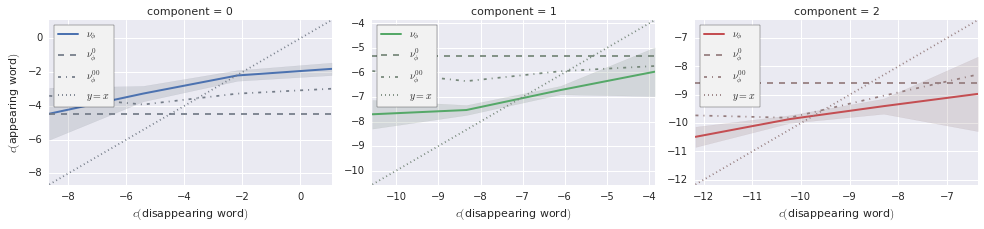

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1593 (cluster-unique) substitutions, but the PCA is in fact computed on 526 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.